## Sales Prediction Using Linear Regression

* 🧠 Objective:
We’re using an Advertising Sales dataset that contains spending on TV, Radio, and Newspaper ads — and the resulting product sales.Our goal? Predict Sales based on ad spend across channels.

### 🔹 Step 1: Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

C:\Users\rm217\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Import csv file 'Advertising Budget and Sales'

In [2]:
df = pd.read_csv('Advertising Budget and Sales.csv')

In [3]:
df.head()

,ID,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### 🔹 Step 2: Data Exploration

##### Check basic information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


##### Check statistics of data

In [5]:
df.describe()

,ID,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


##### Create a pairplot to check the correlation between features and label

C:\Users\rm217\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rm217\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rm217\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rm217\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

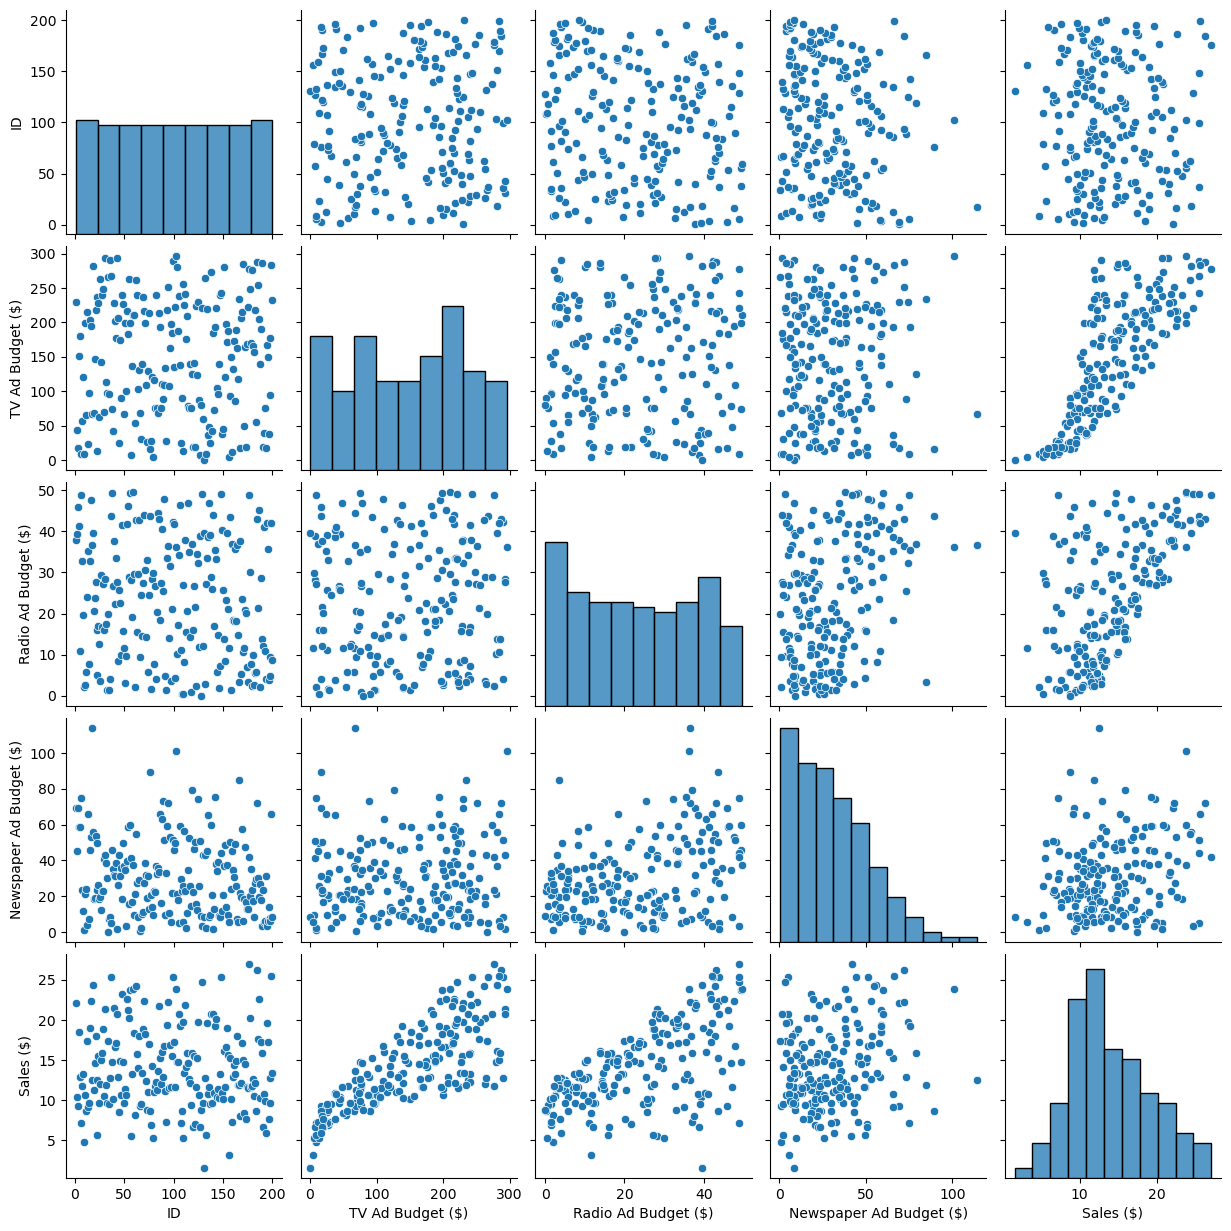

In [6]:
sns.pairplot(df)

### 🔹 Step 3: Prepare Data

##### Check the columns for features and label

In [7]:
df.columns

Index(['ID', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

##### Assign variable X to features and y to label

In [8]:
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)','Newspaper Ad Budget ($)']] #features
y = df['Sales ($)']  #label

##### Import train_test_split from model_selection and split the data using train_test_split

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 🔹 Step 4: Train Linear Regression Model

###### Import LinearRegression from linear_model and train the model on training data

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 🔹 Step 5: Predictions & Evaluation

##### Make prediction on test data

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

### 🔹 Step 6: Key insights from model

#### Q:- How much each channel contributes to sales (based on coefficients)

In [13]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

* These coefficients tell us how much the sales increase when we increase each advertising channel by one unit.

#### Q:- What's the baseline of sales prediction? assuming no money is spent on any advertising channel.

In [14]:
model.intercept_

2.7089490925159048

* This is the baseline sales prediction when all ad spends (TV, Radio, Newspaper) are 0.

### 🔹 Step 7: Model Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
msre = np.sqrt(mse)

print("Mean Absolute Error: ", mae)
print("Mean Square Error: ", mse)
print("Mean Square Root Error: ", msre)

Mean Absolute Error:  1.5116692224549093
Mean Square Error:  3.79679723671522
Mean Square Root Error:  1.9485372043446387


** MAE (Mean Absolute Error):
* It measures the average of the absolute differences between predicted and actual values.
* 👉 Simple to understand – just tells how wrong your predictions are, on average.

** MSE (Mean Squared Error):
* It measures the average of the squared differences between predicted and actual values.
* 👉 Gives more weight to larger errors (because of squaring), so it punishes big mistakes.

** RMSE (Root Mean Squared Error):
* It's the square root of MSE and brings the error back to the original unit of measurement.
* 👉 Easier to interpret than MSE since it’s in the same unit as the target variable.

### 🔹 Step 6: Visualize Predictions vs Actuals

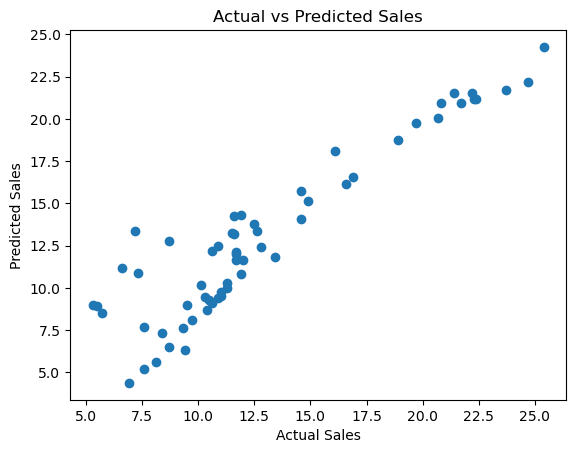

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()